# Vamos a ahora a describir un problema con tres cuerpos: 

Las ecuaciones que tenemos que programar son las siguientes: 
$$ \vec{F}_p = \vec{F}_{sp} + \vec{F}_{pl} $$ 

Los sub índicies son $p:=$ planeta , $sp:=$ sol/satélite \footnote{a gusto del cliente } -planeta , $pl:=$ planeta-luna. 

Entonces: 

$$ \ddot{m_p\vec{x}_p} = -\frac{GM_sM_p \vec{x}_p}{\vert\vec{x}_p \vert^3} -\frac{GM_pM_s(\vec{x}_p-\vec{x}_s)}{\vert \vec{x}_p-\vec{x}_s \vert ^3} $$

Y si cambiamos las unidades a $\tau = \sqrt{GM_s}t$ El problema de arriba se nos convierte en: 

$$\ddot{\vec{x}_p} = -\frac{\vec{x}_p}{\vert x_p \vert ^3} - \frac{m_s}{M_s} \frac{\vec{x}_p - \vec{x}_s}{\vert \vec{x}_p-\vec{x}_s \vert ^3} $$  (Vamo' a programah este de acá) 

Aquí, $\alpha = \frac{m_s}{M_s} $

$$\vec{x}_s = -\frac{\vec{x}_s}{\vert x_S\vert ^3} + \frac{m_p}{M_s} \frac{\vec{x}_p - \vec{x}_s}{\vert \vec{x}_p-\vec{x}_s \vert ^3} $$

Aquí $\beta = \frac{m_p}{M_s}$

Y tenemos que $m_s<m_p<M_s$ entonces $\alpha < \beta  <1$

Ahora vamos a hacer el problema de planetas que se atraen o alejan según sea la interacción entre ellos


$$xp\_xs =[x_p,y_p,v_{xp},v_{yp},x_s,y_s,v_{xs},v_{ys}]$$

El primero es el que yo hice y el segundo el que hizo Rich

In [1]:
from pylab import *
%matplotlib inline

In [2]:
def rk4(ec,p_ini,x,args=0,h=0.01):
    if (x[1]-x[0]) <= 5.*h:
        h = (x[1]-x[0])/10
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    if args==0:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i])
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    else:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i],args)
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h,args)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h,args)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h,args)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    return tiempos,sol

### El mío :c

El error está en que definí rs y rp al revés y el programa pereció funcionar aún así. Maldiciones

In [3]:
def mov(xp_xs,t,a_b=[0,0]):
    rs = sqrt(xp_xs[0]**2 + xp_xs[1]**2)                 ##Aquí están los errores
    rp = sqrt(xp_xs[4]**2 + xp_xs[5]**2)                 ##Aquí también están
    dif_xs_xp = xp_xs[0:2] - xp_xs[4:6]   #resta de los posiciones
    dist_xs_xp = sqrt(dif_xs_xp[0]**2 + dif_xs_xp[1]**2)   #norma de r-r'
    
    dxp, dyp = xp_xs[2], xp_xs[3]
    dvxp = -xp_xs[0]/(rp**3) - (a_b[0]*dif_xs_xp[0])/(dist_xs_xp**3)
    dvyp = -xp_xs[1]/(rp**3) - (a_b[0]*dif_xs_xp[1])/(dist_xs_xp**3)
    
    dxs, dys = xp_xs[6], xp_xs[7]
    dvxs = -xp_xs[4]/(rs**3) + (a_b[1]*dif_xs_xp[0])/(dist_xs_xp**3)
    dvys = -xp_xs[5]/(rs**3) + (a_b[1]*dif_xs_xp[1])/(dist_xs_xp**3)        
    
    return array([dxp,dyp,dvxp,dvyp,dxs,dys,dvxs, dvys])    

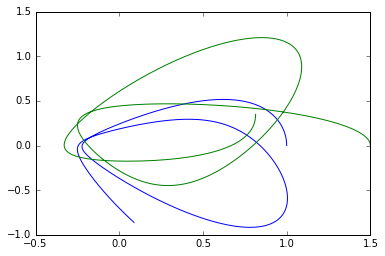

In [4]:
p_ini = [1, 0, 0, 0.5, 1.5, 0, 0, 0.5]
t, r = rk4(mov,p_ini, [0,2*pi])
plot(r[:,0],r[:,1],r[:,4],r[:,5])

### El de Rich

In [5]:
def movR(xp_xs,t,a_b=[0,0]):
    rp = sqrt(xp_xs[0]**2 + xp_xs[1]**2)
    rs = sqrt(xp_xs[4]**2 + xp_xs[5]**2)
    dif_xp_xs =  xp_xs[0:2] - xp_xs[4:6]
    dist_xp_xs = sqrt( dif_xp_xs[0]**2 + dif_xp_xs[1]**2)
    dxp,dyp = xp_xs[2],xp_xs[3]
    dvxp = -xp_xs[0]/(rp**3) - (a_b[0]*dif_xp_xs[0])/(dist_xp_xs**3)
    dvyp = -xp_xs[1]/(rp**3) - (a_b[0]*dif_xp_xs[1])/(dist_xp_xs**3)
    dxs,dys = xp_xs[6],xp_xs[7]
    dvxs = -xp_xs[4]/(rs**3) + (a_b[1]*dif_xp_xs[0])/(dist_xp_xs**3)
    dvys = -xp_xs[5]/(rs**3) + (a_b[1]*dif_xp_xs[1])/(dist_xp_xs**3)
    return array([dxp,dyp,dvxp,dvyp,dxs,dys,dvxs,dvys])

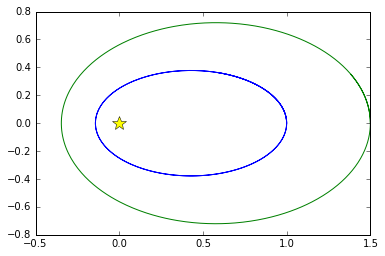

In [6]:
p_ini = [1,0,0,0.5,1.5,0,0,0.5]
t,r = rk4(movR,p_ini,[0,2*pi])
plot(r[:,0],r[:,1],r[:,4],r[:,5])
plot([0],[0],'*',color='yellow',markersize=15)
show()

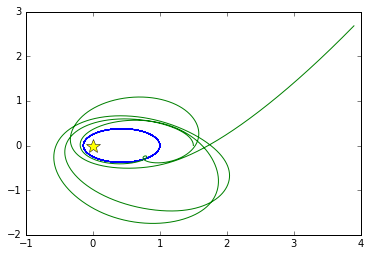

In [7]:
p_ini = [1,0,0,0.5,1.5,0,0,0.5]
t,r = rk4(movR,p_ini,[0,10*pi],[0,.1],.001)
plot(r[:,0],r[:,1],r[:,4],r[:,5])
plot([0],[0],'*',color='yellow',markersize=15)
show()

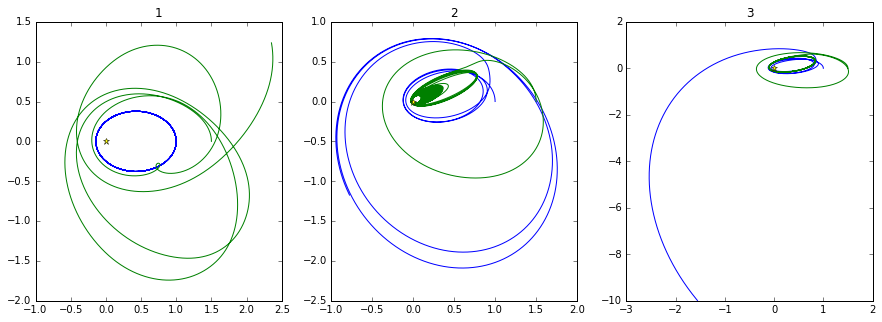

In [10]:
#Con interacción entre planetas
fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(131)
bx = fig.add_subplot(132)
cx = fig.add_subplot(133)

ax.set_title("1")
bx.set_title("2")
cx.set_title("3")

#1
t,r = rk4(movR,p_ini,[0,10*pi],[0,0.1]) #ese penúltimo argumento son [alfa,beta] 
ax.plot(r[:,0],r[:,1],r[:,4],r[:,5])
ax.plot([0],[0],'*',color = 'yellow',markersize=7)#el sol
#xlim(-0.5,2),ylim(-0.5,0.5)

#2
t,r = rk4(movR,p_ini,[0,10*pi],[0.05,0.05],0.001) #ese penúltimo argumento son [alfa,beta] 
bx.plot(r[:,0],r[:,1],r[:,4],r[:,5])
bx.plot([0],[0],'*',color = 'yellow',markersize=7)#el sol
#xlim(-0.5,2),ylim(-0.5,0.5)

#3
t,r = rk4(movR,p_ini,[0,10*pi],[0.07,0.03]) #ese penúltimo argumento son [alfa,beta] 
cx.plot(r[:,0],r[:,1],r[:,4],r[:,5])
cx.plot([0],[0],'*',color = 'yellow',markersize=7)#el sol
#xlim(-0.5,2),ylim(-0.5,0.5)